In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('modified_location_6.xlsx')

In [3]:
df.shape

(61600, 16)

In [4]:
df.isnull().sum()

Date                     0
Day                      0
Year                     0
Month                    0
Location                 0
Rainfall (in mm)         0
Latitude                 0
Longitude                0
Quarter                  0
Cumulative_Rainfall      0
Previous_Day_Rainfall    0
Weekly Sum               0
Weekly_Average           0
hasRainfall              0
Landslide_possibility    0
Season                   0
dtype: int64

In [5]:
df.head()


,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season
0,1901-01-01,Day_1,1901,1,Loc_6,3.0,27.75,88.25,1,3.0,0.0,3.0,3.000000,yes,no,Winter
1,1901-01-02,Day_2,1901,1,Loc_6,8.0,27.75,88.25,1,11.0,3.0,11.0,5.500000,yes,no,Winter
2,1901-01-03,Day_3,1901,1,Loc_6,0.0,27.75,88.25,1,11.0,8.0,11.0,3.666667,no,no,Winter
3,1901-01-04,Day_4,1901,1,Loc_6,0.0,27.75,88.25,1,8.0,0.0,11.0,2.750000,no,no,Winter
4,1901-01-05,Day_5,1901,1,Loc_6,0.0,27.75,88.25,1,0.0,0.0,11.0,2.200000,no,no,Winter


In [6]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df["Year-Month-Day"] = df["Date"].dt.strftime("%Y-%m-%d")  # More precise date format

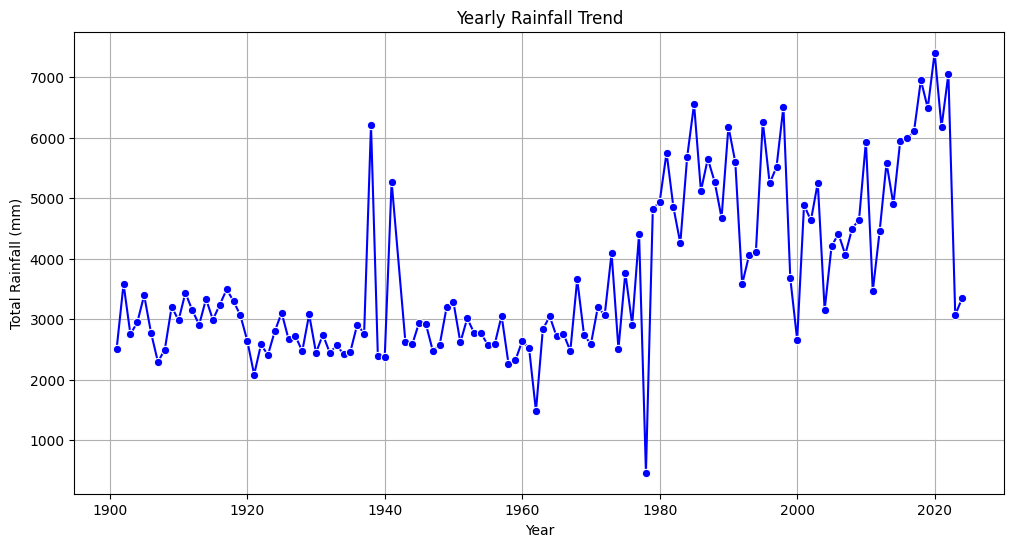

In [7]:
# Yearly Rainfall Trend
yearly_rainfall = df.groupby("Year")["Rainfall (in mm)"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.title("Yearly Rainfall Trend")
plt.grid(True)
plt.show()

C:\Users\apoor\AppData\Local\Temp\ipykernel_12432\4196964380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")


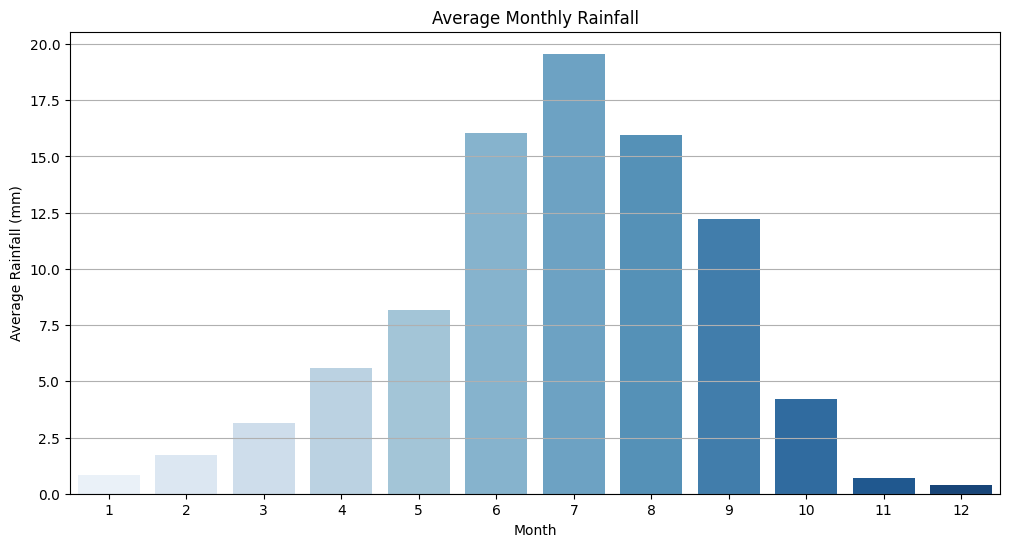

In [8]:
# Monthly and Seasonal Rainfall
monthly_rainfall = df.groupby("Month")["Rainfall (in mm)"].mean()
seasonal_rainfall = df.groupby("Season")["Rainfall (in mm)"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall")
plt.grid(axis="y")
plt.show()

C:\Users\apoor\AppData\Local\Temp\ipykernel_12432\99370349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rainfall.index, y=seasonal_rainfall.values, palette="coolwarm")


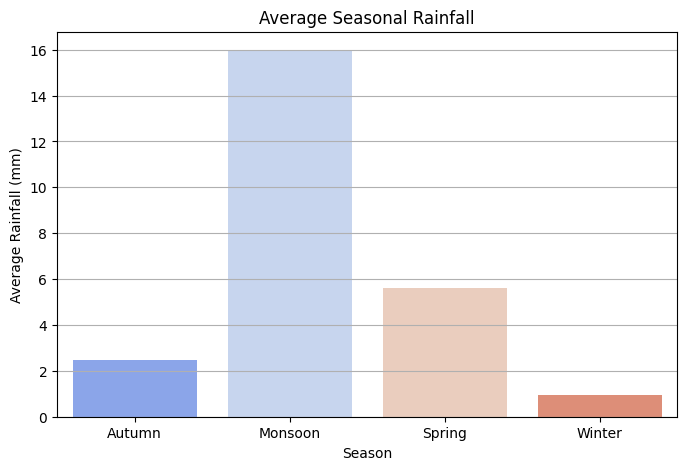

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rainfall.index, y=seasonal_rainfall.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Seasonal Rainfall")
plt.grid(axis="y")
plt.show()

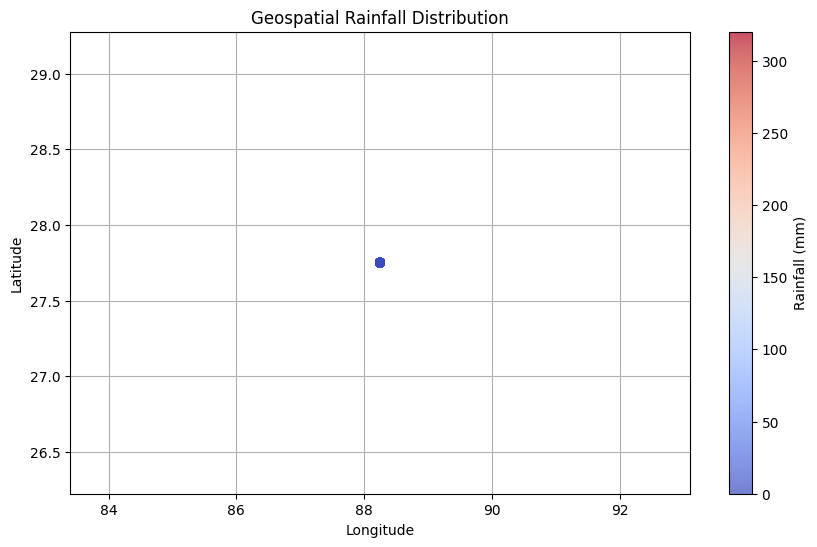

In [10]:
# Geospatial Rainfall Distribution
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Longitude"], df["Latitude"], c=df["Rainfall (in mm)"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Rainfall Distribution")
plt.colorbar(scatter, label="Rainfall (mm)")
plt.grid(True)
plt.show()

In [11]:
# Identify Continuous Rainfall Days
df_sorted = df.sort_values(by=["Location", "Date"])
df_sorted["Rain_Streak"] = (df_sorted["Rainfall (in mm)"] > 0).astype(int)
df_sorted["Rain_Streak"] = df_sorted.groupby("Location")["Rain_Streak"].cumsum()
rain_streaks = df_sorted.groupby(["Location", "Rain_Streak"])["Date"].count().reset_index()
rain_streaks = rain_streaks[rain_streaks["Date"] >= 5]  # Filter for at least 5 continuous days

# Display locations with longest continuous rainy periods
rain_streaks_sorted = rain_streaks.sort_values(by="Date", ascending=False)
print(rain_streaks_sorted.head(10))


      Location  Rain_Streak  Date
16772    Loc_6        16773   175
27726    Loc_6        27727   163
30578    Loc_6        30579   137
17894    Loc_6        17895   133
23268    Loc_6        23269   127
7238     Loc_6         7239   126
16448    Loc_6        16449   125
14634    Loc_6        14635   119
24626    Loc_6        24627   119
29402    Loc_6        29403   115


In [12]:
rain_streaks_sorted["Date"] = pd.to_datetime(rain_streaks_sorted["Date"]).dt.strftime("%d-%m-%Y")  # Format as Day-Month-Year
print(rain_streaks_sorted.head(10))


      Location  Rain_Streak        Date
16772    Loc_6        16773  01-01-1970
27726    Loc_6        27727  01-01-1970
30578    Loc_6        30579  01-01-1970
17894    Loc_6        17895  01-01-1970
23268    Loc_6        23269  01-01-1970
7238     Loc_6         7239  01-01-1970
16448    Loc_6        16449  01-01-1970
14634    Loc_6        14635  01-01-1970
24626    Loc_6        24627  01-01-1970
29402    Loc_6        29403  01-01-1970


In [13]:
rain_streaks_sorted.tail()

,Location,Rain_Streak,Date
21460,Loc_6,21461,01-01-1970
21474,Loc_6,21475,01-01-1970
21714,Loc_6,21715,01-01-1970
21756,Loc_6,21757,01-01-1970
408,Loc_6,409,01-01-1970


In [14]:
import geopandas as gpd

In [16]:
import folium

m = folium.Map(location=(27.3516,88.3239))


In [17]:
folium.Marker(
    location=[27.25, 88.25],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)


m